# Principal Component Analysis (PCA)

## Reconocimiento de Patrones 

## Kaleb Alfaro Badilla

PCA es un instrumento matemático para facilitar la reducción de dimensiones por cada instancia de una gran colección de datos. La meta de la operación del análisis es de encontrar los eigenvector y eigenvalores. Estos vectores directores tienen las cualidades de ser ortogonales y su magnitud representa la dirección de varianza de los datos sobre los atributos. Los vectores con mayor magnitud son aquellos con mayor varianza. Considere el conjunto de vectores directores 

$S=\{ u_1, u_2, \dots, u_n \}, u_k \in \mathbb{R}^d,$ 

donde $d$ representa la cantidad de dimensiones de los atributos de las instancias. Considere que 

$u_k\geq u_{k+1}, k \in \mathbb{N}-\{0\}$

Si se encuentra una cota tal que 

$u_k >> u_{k+1}$ 

Se puede definir una matriz de transformación 

$W, W \in \mathbb{R}^{d\times k}$

Donde cada instancia 

$X, X \in \mathbb{R}^{d}$ se mapea a una instancia $Z, Z \in \mathbb{R}^{k}$, de la forma


$X\times W = Z$


El procedimiento para realizar esta transformación se enlista

1. Realizar una estandarización estadística sobre cada atributo.
2. Calcular la matriz de covarianzas $\Sigma$.

$\Sigma = \begin{bmatrix}
    \sigma_{1}^2       & \dots & \sigma_{1d} \\
    \vdots        &\ddots & \vdots \\
    \sigma_{d1}        & \dots & \sigma_{d}^2
\end{bmatrix}$

$\sigma_{jk}=\frac{1}{n}\sum_{i=1}^n (x_j^i-\mu_j)(x_{k}^i-\mu_k)$

3. A partir de $\Sigma$ determinar los eigenvectores y eigenvalores.

$\Sigma v=\lambda v$

4. Escoger de la colección de eigenvectores, los vectores más relevantes.
5. Transformar cada vector $X$ con la matriz de transformación $W$.


## Caso de estudio 1
### Estudio de flores de clase Iris

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

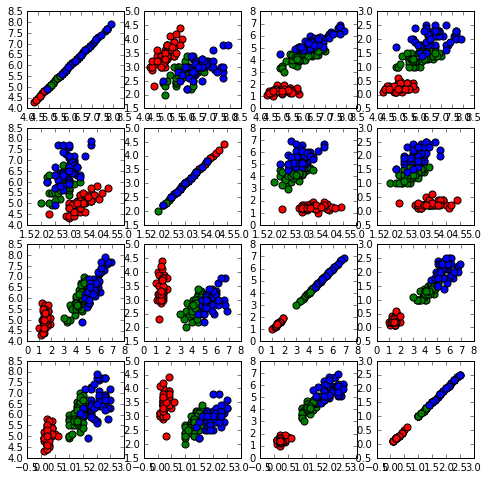

In [2]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

fig = plt.figure(figsize = (8,8))

for i in range(0,4):
    for j in range(0,4):
        ax = fig.add_subplot(4,4,(i)*4+(j+1))
        for target, color  in zip(targets,colors):
            indicesToKeep = df['target'] == target
            ax.scatter(df.loc[indicesToKeep, features[i]]
                   , df.loc[indicesToKeep, features[j]]
                   , c = color
                   , s = 50)


    
# Standardizing the features
x = StandardScaler().fit_transform(x)
#print(x)


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
5                -2.070537               1.518549     Iris-setosa
6                -2.445711               0.074563     Iris-setosa
7                -2.233842               0.247614     Iris-setosa
8                -2.341958              -1.095146     Iris-setosa
9                -2.188676              -0.448629     Iris-setosa
10               -2.163487               1.070596     Iris-setosa
11               -2.327378               0.158587     Iris-setosa
12               -2.224083              -0.709118     Iris-setosa
13               -2.639716              -0.938282     Iris-setosa
14        

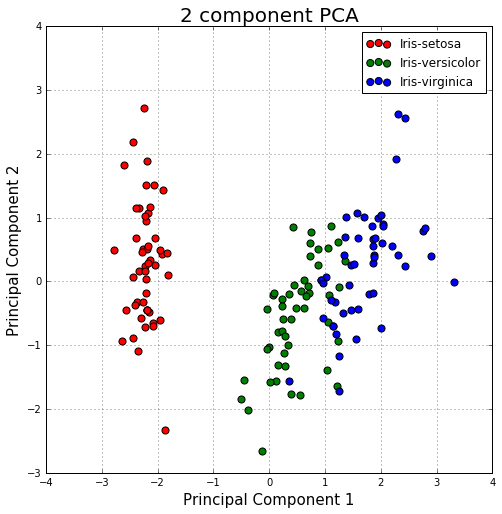

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [7]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

## Caso de estudio 2
# Clases de vinos

In [2]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3,
stratify=y,
random_state=0)
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.84274532  2.41602459  1.54845825  0.96120438  0.84166161  0.6620634
  0.51828472  0.34650377  0.3131368   0.10754642  0.21357215  0.15362835
  0.1808613 ]


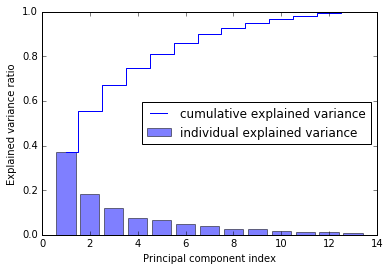

In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [7]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [8]:
X_train_std[0].dot(w)

array([ 2.38299011,  0.45458499])

In [9]:
X_train_pca = X_train_std.dot(w)

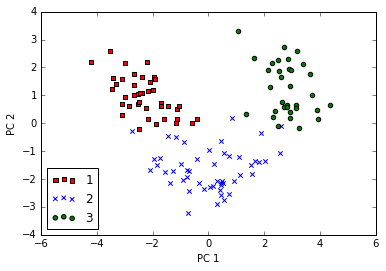

In [12]:
import matplotlib
import matplotlib.pyplot as plt
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()